In [2]:
import numpy as np

In [3]:
data_1 = np.loadtxt('data1.txt', delimiter='\n')

In [4]:
data_1

array([1.65, 1.69, 1.29, 2.3 , 1.62, 1.57, 2.7 , 2.13, 1.15, 2.15, 2.39,
       1.38, 1.43, 1.17, 2.21, 2.08, 1.85, 1.42, 2.9 , 2.41, 2.78, 1.99,
       1.54, 2.3 , 2.03, 2.1 , 1.83, 1.09, 1.01, 2.  , 1.35, 2.  , 1.95,
       1.38, 1.56, 1.66, 1.47, 2.14, 1.47, 2.63, 2.34, 2.23, 2.25, 2.32,
       1.06, 1.95, 2.09, 1.62, 2.87, 1.44, 2.51, 1.31, 1.4 , 2.16, 2.91,
       1.79, 1.9 , 1.72, 2.46, 1.14, 1.76, 1.34, 2.14, 2.8 , 2.25, 2.7 ,
       1.75, 2.99, 2.22, 1.81, 1.68, 2.96, 2.23, 2.84, 2.35, 2.34, 2.63,
       2.76, 2.42, 2.24, 1.58, 2.22, 1.39, 2.33, 2.7 , 1.5 , 1.59, 2.52,
       1.79, 1.75, 2.95, 1.72, 2.33, 2.34, 2.48, 2.86, 1.72, 2.18, 1.66,
       1.19])

In [5]:
def frequency_matrix(data=0):
    frequency = np.unique(data, return_counts=True)
    return np.array(frequency).T
    

In [6]:
def expectedvalue(data=0):
    size = len(data)
    probability = frequency_matrix(data)
    probability[:,1] = probability[:,1]/size
    return np.sum(probability[:,0]*probability[:,1])
    

In [7]:
expectedvalue(data_1)

2.0025

In [8]:
def variance(data=0):
    size = len(data)
    frequency_mat = frequency_matrix(data)
    exp_value = expectedvalue(data)
    return (1/size)* np.sum(frequency_mat[:,1]*((frequency_mat[:,0] - exp_value)**2))
    

In [9]:
variance(data_1)

0.26772475000000007

In [10]:
from scipy.stats import norm
import matplotlib.pyplot as plt

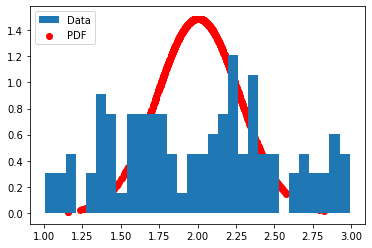

In [11]:
exp_value = expectedvalue(data_1)
var = variance(data_1)
x = np.random.normal(exp_value, var, 1000)
plt.hist(data_1, density=True, bins=30, label="Data")
plt.scatter(x, norm.pdf(x,exp_value, var),color= 'red',  label="PDF")
plt.legend(loc="upper left")
plt.show()

### Plot a histogram for the random sample.

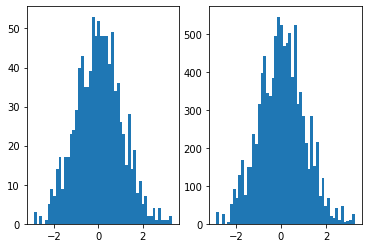

In [12]:
data = np.random.normal(size=1000)
hist, bins = np.histogram(data, bins=50)

bin_midpoints = bins[:-1] + np.diff(bins)/2
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]
values = np.random.rand(10000)
value_bins = np.searchsorted(cdf, values)
random_from_cdf = bin_midpoints[value_bins]

plt.subplot(121)
plt.hist(data, 50)
plt.subplot(122)
plt.hist(random_from_cdf, 50)
plt.show()


### Random uniform

In [13]:
data_ud = np.random.uniform(0,4,50)

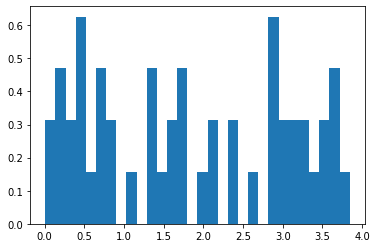

In [26]:
count, bins, ignored = plt.hist(data_ud, 30, density=True)
plt.show()


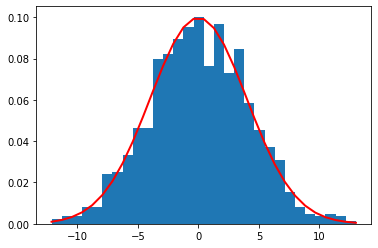

In [15]:
mu, sigma = 0, 4 # mean and standard deviation
nd_size = 1000
normal_data = np.random.normal(mu, sigma,nd_size)
count, bins, ignored = plt.hist(normal_data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

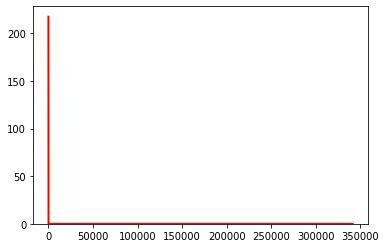

In [16]:
mu, sigma = 0, 4 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

### Exptected value of Uniform distribution

In [17]:
expectedvalue(data_ud)

1.8354457751421522

### Expected value of normal distribution

In [18]:
np.var(normal_data)

16.57604438570073

In [19]:
variance(normal_data)

16.576044385700726

### The interval

In [20]:
def interval(data):
    exp_value = expectedvalue(data)
    sd = np.std(exp_value)
    return (abs(exp_value) - abs(sd)), (abs(exp_value) + abs(sd))
    

### The confidence interval

In [21]:
def confidence_interval(data,confidence):
    exp_value = expectedvalue(data)
    return norm.interval(confidence, loc=exp_value, scale=np.std(data))

In [22]:
confidence_interval(normal_data, 0.95)

(-7.922953224070546, 8.036519438604422)

In [23]:
interval(normal_data)

(0.056783107266937805, 0.056783107266937805)

In [24]:
std

NameError: name 'std' is not defined